# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Clustering and dimension-reduction
### VIDEO: K-means clustering
#### TEACHER: Mike X Cohen, sincxpress.com

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
# supress kmeans memory leak warning on
# %env OMP_NUM_THREADS=1  doesn't work


env: OMP_NUM_THREADS=1


In [77]:
# experimenting with transpose and concatenate

A = [  1, 1 ] # x, y coords
B = [ -3, 1 ]
C = [  3, 3 ]
print(A)

a = [A[0]+np.ones(2)*3,A[1]+np.ones(2)*3]
b = [B[0]+np.ones(2)*5,B[1]+np.ones(2)*5]
print('[...xcoords, ...ycoords]')
print(f'{a=}')
print(f'{b=}')

print('\n vstack - no good, coords are interleaved:')
print(np.vstack((a,b)))

# keeps same shape [[x][y]] and combines/appends element wise from the different datasets (xs appended to xs in one row and y's appended to y's in the other)
print('\n concating and transposing:')
d = np.concatenate((a,b),axis=1)
print('concated only on axis=1:')
print(d)
print('transposed:')
dt = np.transpose(d)
print(dt)

print('\n concated x and y slices:')
print(d[0],d[1])
print('transposed x and y slices: ')
print(dt[:,0],dt[:,1])


[1, 1]
[...xcoords, ...ycoords]
a=[array([4., 4.]), array([4., 4.])]
b=[array([2., 2.]), array([6., 6.])]

 vstack - no good, coords are interleaved:
[[4. 4.]
 [4. 4.]
 [2. 2.]
 [6. 6.]]

 concating and transposing:
concated only on axis=1:
[[4. 4. 2. 2.]
 [4. 4. 6. 6.]]
transposed:
[[4. 4.]
 [4. 4.]
 [2. 6.]
 [2. 6.]]

 concated x and y slices:
[4. 4. 2. 2.] [4. 4. 6. 6.]
transposed x and y slices: 
[4. 4. 2. 2.] [4. 4. 6. 6.]


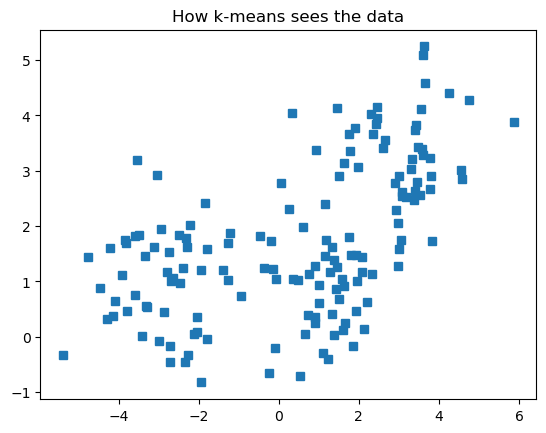

In [78]:
## Create data

nPerClust = 50 # 50 data points in each cluster (3 clusters)

# blur around centroid (std units)
blur = 1 # amount of variance around each centroid - held constant across the groups below

# XY centroid locations - 3 different data clusters
A = [  1, 1 ] # x, y coords
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
# Generate 50 gaussian distributed numbers, stretch them out with a blur factor, add on the X or Y centroid
# this creates nPerClust X points (in one array) and nPerClust Y points (in second arr) - each point is added to a random number - [[X1,X2,X3,X4,...],[Y1,Y2,Y3,Y4,...]]
# Since we are adding a numpy array and not just a number, it runs the operation result and generates that many elements
# the blur is a factor multiplication is applied first to the numpy array (multiplication is done before addition in std order of ops), then A[0] etc. is added to that result
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list - vector of 150 (50*3) rows and two columns (the x and y)
# We do this to allow for easy selection of all xcoords (in one column) and all ycoords (in another column) for plotting
# Concatenate element wise ([ [ ...A[xcoords],...B[xcoords],...C[xcoords] ], [ ...A[ycoords],...B[ycoords],...C[ycoords] ] ] ) - xcoords from datasets on one row, ycoords for datasets on another row
data = np.transpose(np.concatenate((a,b,c),axis=1))
# data = np.concatenate((a,b,c),axis=1)

# show the data
# first arg is x's and second arg is y's
plt.plot(data[:,0],data[:,1],'s') # [:,0] is all rows and the first column, [:1] is all rows and the second column
# plt.plot(data[0],data[1],'s') # This can be done to get same result if you don't transpose and just use the concatenated data (the first row is xcoords and second row is ycoords)
plt.title('How k-means sees the data') 
plt.show()

c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


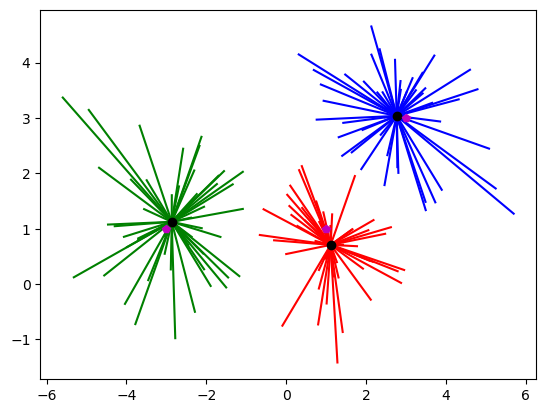

In [68]:
## k-means clustering

k = 3 # how many clusters? We fix it to the right answer we know since we created the data
kmeans = KMeans(n_clusters=k) # create the kmeans object with num clusters
kmeans = kmeans.fit(data) # fit to the data passed in
# group labels - 0,1 or 2 - label tells us which group the data point is in (0 1 or 2)
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_ # x and y coords for the computed centers

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data)):
    plt.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko') # black dots - the centroids from the kmeans clusters computation

# finally, the "ground-truth" centers - shows how far off the computed centroids are from the actuals
plt.plot(A[0],A[1],'mp') # purple dots show the centroids we specified in the data
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

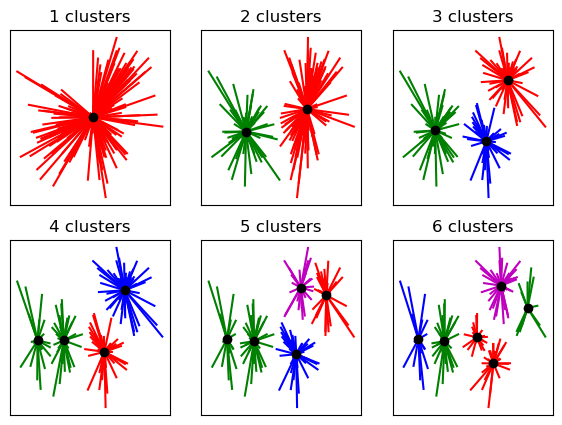

In [70]:
## determining the appropriate number of clusters (QUALITATIVE)

# we run kmeans with a different number of clusters and look at the results to see if we can infer anything
# The idea in Qualitative testing is to re-run the kmeans over and over and look at the plot results to see if they change a lot
  # If the cluster assignments are changing alot each time you run the code with the same data, that means there are probably too many clusters

# in this case, the results for 6 clusters change a lot - suggests 6 is too high
# if we look at the results for 3 clusters, the results stay mostly the same
  # Note that the label/color can change randomly and that's not a problem - they are assigned randomly

fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):
    
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_15384\2232665719.py:17: RuntimeWarning: invalid value encountered in divide
  sils = np.zeros(7)/0
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_in

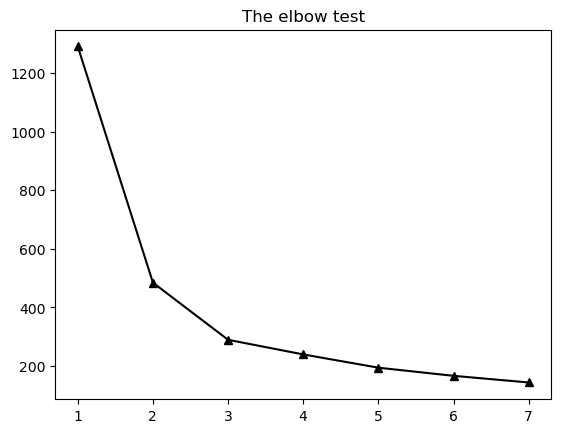

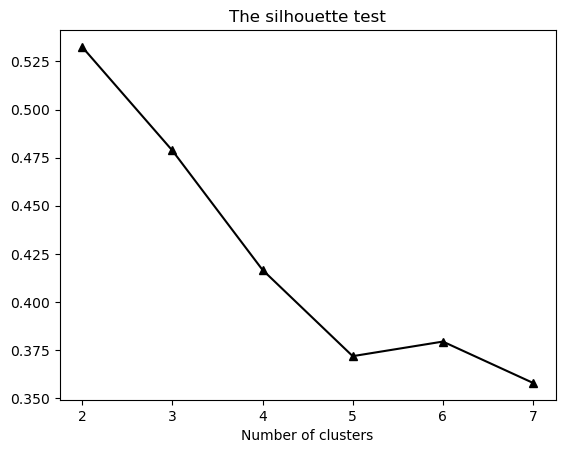

In [74]:
## number of clusters (QUANTITATIVE)

from sklearn.metrics import silhouette_samples, silhouette_score

# Silhouette coefficient of a cluster refers to a metric about the quality of the clustering, i.e. how well that clustering worked out
  # we want to look for number of clusters that maximizes the silhouette coefficient

# We also look for the Sum of Squared distances (how far apart data points are from the means)
  # the more clusters you have, the smaller the squared distances are going to be
  # we want to find the "elbow" - look at plot and determine visually which data point has the biggest bend (like an elbow point)
  # that point is the optimal number of clusters
  # see [video](https://www.udemy.com/course/statsml_x/learn/lecture/20246034#questions) at 20:40

ssds = np.zeros(7)

# initializing a variable to NaN's (not-a-number). Python will ignore NaN values in the plot, which is 
# useful here because it allows us to avoid having 0's in the plot. 
# If you remove the "/0" part, then you get extra zeros in the graph, which make it more difficult to interpret.
sils = np.zeros(7)/0
# sils = np.full(7, np.nan) # not sure if this will still work?

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)
    
    if k>0:
        s = silhouette_samples(data,kmeans.predict(data))
        sils[k] = np.mean( s )

# Elbow Test plot
plt.plot(np.arange(1,8),ssds,'k^-',markerfacecolor='k')
plt.title('The elbow test')
plt.show()


# Silhouette test plot
# this will show two (the highest silhouette coeff on the y axis), note that it is wrong (the correct num of clusters is 3)
  # this highlights the difficulties that come with kmeans clustering
plt.plot(np.arange(1,8),sils,'k^-',markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

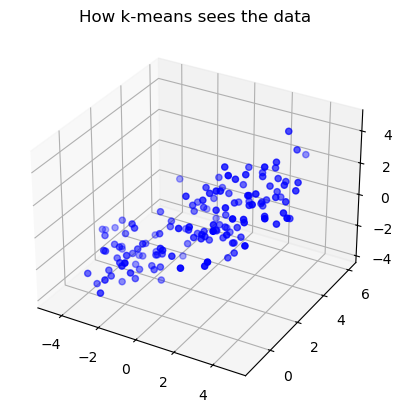

In [80]:
## Try again in 3D
# Using Higher Dimensional data

nPerClust = 50

# blur around centroid (std units)
n = 1

# XY centroid locations
A = [  1, 2,  0 ] # X, Y and Z locations of the centroids
B = [ -2, 1, -2 ]
C = [  3, 3,  2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*n , A[1]+np.random.randn(nPerClust)*n , A[2]+np.random.randn(nPerClust)*n ]
b = [ B[0]+np.random.randn(nPerClust)*n , B[1]+np.random.randn(nPerClust)*n , B[2]+np.random.randn(nPerClust)*n ]
c = [ C[0]+np.random.randn(nPerClust)*n , C[1]+np.random.randn(nPerClust)*n , C[2]+np.random.randn(nPerClust)*n ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# may need this with update - can remove axes3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# show the data
# ax = Axes3D(plt.figure()) # doesn't work
ax.scatter(data[:,0],data[:,1],data[:,2], c = 'b', marker='o')
plt.title('How k-means sees the data')
plt.show()

In [83]:

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm'

for i in range(0,len(data)):
    ax.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],[ data[i,2],cents[groupidx[i],2] ],lineColors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:,0],cents[:,1],cents[:,2],'ko')

plt.show()

c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
